In [ ]:
#the Reference is Taken from the Github NoteBook:https://github.com/parmarsuraj99/10DaysofMLChallenge/blob/master/days/Day5_10DaysOfMLChallenge.ipynb

# The Dataset is present on the link : https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [16]:
import os
import gc
import glob
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img

In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [19]:
cat_files = glob.glob("*/*/*/cat*.jpg")
dog_files = glob.glob("*/*/*/dog*.jpg")
random = np.random.randint(0, len(cat_files), 5)
print("Cat shapes")
for cat in random:
    img = load_img(cat_files[cat])
    print(img_to_array(img).shape)

random = np.random.randint(0, len(dog_files), 5)
print("Dog shapes")
for i in random:
    img = load_img(cat_files[i])
    print(img_to_array(img).shape)


Cat shapes
(500, 394, 3)
(359, 480, 3)
(210, 349, 3)
(500, 324, 3)
(360, 399, 3)
Dog shapes
(374, 500, 3)
(331, 500, 3)
(355, 500, 3)
(245, 367, 3)
(303, 500, 3)


In [20]:
batch_size = 32
input_shape = (150, 150)

In [21]:
base_model = ResNet50(weights=None,include_top=False,input_shape=(input_shape[0], input_shape[1], 3))

In [22]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(1, activation="sigmoid")(x)

model = Model(inputs = base_model.input, outputs=predictions)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [24]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [27]:

train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs_filtered/train',
        target_size=input_shape,
        batch_size=batch_size,
        class_mode='binary')
validation_generator = valid_datagen.flow_from_directory('cats_and_dogs_filtered/validation',
        target_size=input_shape,
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
train_steps_per_epoch = train_generator.n//train_generator.batch_size
valid_steps_per_epoch = validation_generator.n//validation_generator.batch_size


In [29]:
gc.collect()

495

In [30]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

In [31]:
model.compile(optimizer="rmsprop",
              loss=tf.keras.losses.binary_crossentropy,
              metrics=["accuracy"],
              )

In [43]:
#i didnt train this model due to time constarints, as i have to get the results in 2 hrs  
"""""history = model.fit_generator(train_generator,
                    steps_per_epoch = train_steps_per_epoch,
                    epochs = 50,
                    validation_data = validation_generator,
                    validation_steps = valid_steps_per_epoch,
                    callbacks=[reduce_lr])"""

'""history = model.fit_generator(train_generator,\n                    steps_per_epoch = train_steps_per_epoch,\n                    epochs = 50,\n                    validation_data = validation_generator,\n                    validation_steps = valid_steps_per_epoch,\n                    callbacks=[reduce_lr])'

In [ ]:
#Pretrained Net
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(input_shape[0], input_shape[1], 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.binary_crossentropy,
              metrics=["accuracy"],
              )

In [39]:
#the model is trained for 10 epochs , but for higher accuracy, train it till 50 epochs
history2 = model.fit_generator(train_generator,
                    steps_per_epoch = train_steps_per_epoch,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = valid_steps_per_epoch,
                    callbacks=[reduce_lr])

Epoch 1/10
63/63 [==============================] - 80s 1s/step - loss: 0.6539 - acc: 0.6070 - val_loss: 0.6868 - val_acc: 0.5860
Epoch 2/10
63/63 [==============================] - 73s 1s/step - loss: 0.6428 - acc: 0.6370 - val_loss: 0.6361 - val_acc: 0.6450
Epoch 3/10
63/63 [==============================] - 72s 1s/step - loss: 0.6151 - acc: 0.6590 - val_loss: 0.6000 - val_acc: 0.6670
Epoch 4/10
63/63 [==============================] - 76s 1s/step - loss: 0.5865 - acc: 0.6970 - val_loss: 0.6110 - val_acc: 0.6910
Epoch 5/10
63/63 [==============================] - 72s 1s/step - loss: 0.5658 - acc: 0.7005 - val_loss: 0.5984 - val_acc: 0.6830
Epoch 6/10
63/63 [==============================] - 72s 1s/step - loss: 0.5350 - acc: 0.7330 - val_loss: 0.5707 - val_acc: 0.7090
Epoch 7/10
63/63 [==============================] - 72s 1s/step - loss: 0.5102 - acc: 0.7305 - val_loss: 0.5752 - val_acc: 0.6950
Epoch 8/10
63/63 [==============================] - 71s 1s/step - loss: 0.4929 - acc: 0.75

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


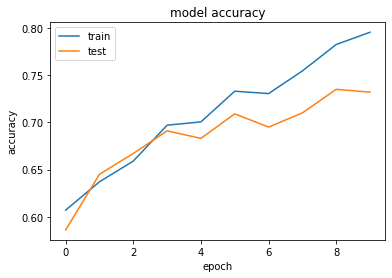

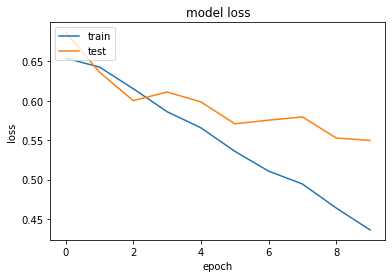

In [42]:
#Pretrained Net
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()